# Language Identification | Classification

© Explore Data Science Academy

---
### Honour Code

I **Khutso Madiga**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

### 1. Import relevant packages

In [1]:
import numpy as np
import pandas as pd
import spacy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.style as style
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
# NLTK - Natural Language Toolkit
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import re


# set plot style
sns.set()

from collections import Counter
# In anaconda prompt, type 'conda install -c conda-forge wordcloud=1.8.1'
from wordcloud import WordCloud
# In anaconda prompt, type 'conda install -c conda-forge spacy'
# followed by 'python -m spacy download en_core_web_sm'
# spaCy is a library for advanced natural language processing in Python
import spacy
nlp = spacy.load("en_core_web_sm")

import warnings
warnings.filterwarnings("ignore")

### 2. Load the data

In [2]:
data = pd.read_csv("train_set.csv")
df = data.copy()
df.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [3]:
test=pd.read_csv('test_set.csv')

### 3. Data Preprocessing

1) First we convert all text to lowercase to ensure that the data is more consistent and model does not differentiate between identical words due to lower or uppercase

In [4]:
df['text'] = df['text'].str.lower()

2) Remove stopwords so that focus is placed on important words. Enlish stopwords will first be removed then stopwords from other languages removed.

In [5]:
#english stopwords from nltk library
from nltk.corpus import stopwords

stopwords_list = stopwords.words("english")
print("Stopwords in the English language:\n\n", stopwords_list)

Stopwords in the English language:

 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', '

In [6]:
#other stop words from sotho, zulu and afrikaans
other_stop_words=pd.read_csv('stops.csv')

In [7]:
other_stop_words.head()

,words
0,ukuthi
1,kodwa
2,futhi
3,kakhulu
4,wakhe


In [8]:
#turn the stopwords column into a list

other_wrd_lst = other_stop_words['words'].tolist()
print(other_wrd_lst)

['ukuthi', 'kodwa', 'futhi', 'kakhulu', 'wakhe', 'kusho', 'uma', 'wathi', 'kanye', 'phansi', 'ngesikhathi', 'lapho', 'u', 'zakhe', 'khona', 'ukuba', 'nje', 'phezulu', 'yakhe', 'kungani', 'wase', 'zonke', 'la', 'mina', 'wami', 'ukuze', 'wahamba', 'kahle', 'lakhe', 'a', 'le', 'o', 'ba', 'ho', 'oa', 'ea', 'ka', 'hae', 'eaba', 'ke', 'hore', 'ha', 'e', 'ne', 're', 'bona', 'me', 'tsa', 'la', 'empa', 'se', 'moo', 'bane', 'mo', 'tse', 'sa', 'li', 'ena', 'tloha', 'hape', 'die', 'het', 'en', 'sy', 'nie', "'n", 'ŉ', 'was', 'hy', 'te', 'is', 'ek', 'om', 'hulle', 'in', 'my', 'vir', 'toe', 'haar', 'van', 'dit', 'op', 'se', 'wat', 'met', 'by', 'gaan', 'baie', 'ons', 'jy', 'na', 'maar', 'hom', 'so', 'kan', 'aan', 'dat', 'daar', 'sal', 'jou', 'gesê', 'kom', 'een', 'ma', 'as', 'al', 'saam', 'uit', 'dag', 'sien', 'af']


In [9]:
#combine english stopwords with sotho, zulu and afrikaans

all_stop_words = stopwords_list + other_wrd_lst
print(all_stop_words )


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
#create a column that contains cleaned texts without the stopwords

without_stopwords = []
for char in range(len(df["text"])):
    split = df["text"][char].split(" ")
    for word in all_stop_words:
        if word in split:
            split.remove(word)
    without_stopwords.append(' '.join(map(str, split)))
    
            
        
df["text_without_noise"] = without_stopwords

3) Remove punctuations which assist in treating each text equally. Words like hamba and hamba! will be treated equally although they might have a different tone.

In [11]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
# Function to remove any punctuation
def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])

In [13]:
df["text_without_noise"] = df["text_without_noise"].apply(remove_punctuation)

4) Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph.
Now we will tokenize our dataset.

In [14]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

tokeniser = TreebankWordTokenizer()
df["tokens_text_without_noise"] = df["text_without_noise"].apply(tokeniser.tokenize)

In [15]:
df.head(10)

,lang_id,text,text_without_noise,tokens_text_without_noise
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulu-natal department of tr...,province kwazulunatal department of transport ...,"[province, kwazulunatal, department, of, trans..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore file dilo moka tše dumelelanego...,"[netefatša, gore, file, dilo, moka, tše, dumel..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...,dinyakišišo tše tša go dirwa gabedi ngwaga di ...,"[dinyakišišo, tše, tša, go, dirwa, gabedi, ngw..."
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...,kgetse nngwe nngwe e faposiwang tshekong go ya...,"[kgetse, nngwe, nngwe, e, faposiwang, tshekong..."
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...,mbadelo dze dza laelwa dzi kwama mahatulele ap...,"[mbadelo, dze, dza, laelwa, dzi, kwama, mahatu..."
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...,maloko dikhuduthamaga ikarabela mongwe mongwe ...,"[maloko, dikhuduthamaga, ikarabela, mongwe, mo..."
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...,fa dirisiwa lebone le tshwanetse go bontsha le...,"[fa, dirisiwa, lebone, le, tshwanetse, go, bon..."


5) Lemmatizing is the process of switching any word to its base word. We choose this method over its altenative, stemming, as lemmatization provides better results by producing real, dictionary words.

In [16]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [17]:
# Function to convert words to their lemmas
def tokenized_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words] 

In [18]:
# Function to convert our tokens to a string
def tostring(x):
    return ' '.join([str(elem) for elem in x])

In [19]:
df['lemma'] = df['tokens_text_without_noise'].apply(tokenized_lemma, args=(lemmatizer, ))
df['lemma_string'] = df['lemma'].apply(tostring)

In [20]:
df.head(10)

,lang_id,text,text_without_noise,tokens_text_without_noise,lemma,lemma_string
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko...",umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben...",idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,province kwazulunatal department of transport ...,"[province, kwazulunatal, department, of, trans...","[province, kwazulunatal, department, of, trans...",province kwazulunatal department of transport ...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore file dilo moka tše dumelelanego...,"[netefatša, gore, file, dilo, moka, tše, dumel...","[netefatša, gore, file, dilo, moka, tše, dumel...",netefatša gore file dilo moka tše dumelelanego...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...,dinyakišišo tše tša go dirwa gabedi ngwaga di ...,"[dinyakišišo, tše, tša, go, dirwa, gabedi, ngw...","[dinyakišišo, tše, tša, go, dirwa, gabedi, ngw...",dinyakišišo tše tša go dirwa gabedi ngwaga di ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...,kgetse nngwe nngwe e faposiwang tshekong go ya...,"[kgetse, nngwe, nngwe, e, faposiwang, tshekong...","[kgetse, nngwe, nngwe, e, faposiwang, tshekong...",kgetse nngwe nngwe e faposiwang tshekong go ya...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...,mbadelo dze dza laelwa dzi kwama mahatulele ap...,"[mbadelo, dze, dza, laelwa, dzi, kwama, mahatu...","[mbadelo, dze, dza, laelwa, dzi, kwama, mahatu...",mbadelo dze dza laelwa dzi kwama mahatulele ap...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...,maloko dikhuduthamaga ikarabela mongwe mongwe ...,"[maloko, dikhuduthamaga, ikarabela, mongwe, mo...","[maloko, dikhuduthamaga, ikarabela, mongwe, mo...",maloko dikhuduthamaga ikarabela mongwe mongwe ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...,fa dirisiwa lebone le tshwanetse go bontsha le...,"[fa, dirisiwa, lebone, le, tshwanetse, go, bon...","[fa, dirisiwa, lebone, le, tshwanetse, go, bon...",fa dirisiwa lebone le tshwanetse go bontsha le...


In [21]:
# Add an index column to the data so that there are unique identifiers
df['index']=df.index
df.head()

,lang_id,text,text_without_noise,tokens_text_without_noise,lemma,lemma_string,index
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko...",umgaqosiseko wenza amalungiselelo kumaziko axh...,0
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben...",idha iya kuba nobulumko bokubeka umsebenzi nap...,1
2,eng,the province of kwazulu-natal department of tr...,province kwazulunatal department of transport ...,"[province, kwazulunatal, department, of, trans...","[province, kwazulunatal, department, of, trans...",province kwazulunatal department of transport ...,2
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore file dilo moka tše dumelelanego...,"[netefatša, gore, file, dilo, moka, tše, dumel...","[netefatša, gore, file, dilo, moka, tše, dumel...",netefatša gore file dilo moka tše dumelelanego...,3
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...,4


In [22]:
df.index=df.index+1
df.head()

,lang_id,text,text_without_noise,tokens_text_without_noise,lemma,lemma_string,index
1,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko...",umgaqosiseko wenza amalungiselelo kumaziko axh...,0
2,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben...",idha iya kuba nobulumko bokubeka umsebenzi nap...,1
3,eng,the province of kwazulu-natal department of tr...,province kwazulunatal department of transport ...,"[province, kwazulunatal, department, of, trans...","[province, kwazulunatal, department, of, trans...",province kwazulunatal department of transport ...,2
4,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore file dilo moka tše dumelelanego...,"[netefatša, gore, file, dilo, moka, tše, dumel...","[netefatša, gore, file, dilo, moka, tše, dumel...",netefatša gore file dilo moka tše dumelelanego...,3
5,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...,4


### 4. Exploratory Data Analysis

In [23]:
# Generate statistics that include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values
df.lang_id.describe()

count     33000
unique       11
top         xho
freq       3000
Name: lang_id, dtype: object

In [24]:
# Print out a list of unique languages
type_of_lang = list(df.lang_id.unique())
print(type_of_lang)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


In [25]:
df.drop_duplicates(subset='lang_id', keep="last")

,lang_id,text,text_without_noise,tokens_text_without_noise,lemma,lemma_string,index
32972,tso,namuntlha tatana a a lo vusiku sala endlwini a...,namuntlha tatana lo vusiku sala endlwini a ya ...,"[namuntlha, tatana, lo, vusiku, sala, endlwini...","[namuntlha, tatana, lo, vusiku, sala, endlwini...",namuntlha tatana lo vusiku sala endlwini a ya ...,32971
32978,nbl,a omunye nomunye umuntu nanyana isikhungo esit...,omunye nomunye umuntu nanyana isikhungo esitsh...,"[omunye, nomunye, umuntu, nanyana, isikhungo, ...","[omunye, nomunye, umuntu, nanyana, isikhungo, ...",omunye nomunye umuntu nanyana isikhungo esitsh...,32977
32987,ven,france o vutshela mushumoni o ambara dzhasi ḽi...,france vutshela mushumoni ambara dzhasi ḽilapf...,"[france, vutshela, mushumoni, ambara, dzhasi, ...","[france, vutshela, mushumoni, ambara, dzhasi, ...",france vutshela mushumoni ambara dzhasi ḽilapf...,32986
32989,afr,armoedige huishoudings word geïdentifiseer en ...,armoedige huishoudings word geïdentifiseer reg...,"[armoedige, huishoudings, word, geïdentifiseer...","[armoedige, huishoudings, word, geïdentifiseer...",armoedige huishoudings word geïdentifiseer reg...,32988
32990,ssw,imenenja yesigodzi utakwatisa ngembhalo uma le...,imenenja yesigodzi utakwatisa ngembhalo lesice...,"[imenenja, yesigodzi, utakwatisa, ngembhalo, l...","[imenenja, yesigodzi, utakwatisa, ngembhalo, l...",imenenja yesigodzi utakwatisa ngembhalo lesice...,32989
32993,zul,a umqondisi-jikelele azise umuntu okukhulunywa...,umqondisijikelele azise umuntu okukhulunywa ng...,"[umqondisijikelele, azise, umuntu, okukhulunyw...","[umqondisijikelele, azise, umuntu, okukhulunyw...",umqondisijikelele azise umuntu okukhulunywa ng...,32992
32994,nso,molawana o akaretša mesepelo ka moka ya baname...,molawana akaretša mesepelo moka ya banamedi go...,"[molawana, akaretša, mesepelo, moka, ya, banam...","[molawana, akaretša, mesepelo, moka, ya, banam...",molawana akaretša mesepelo moka ya banamedi go...,32993
32996,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,popo ya dipolateforomo go tlisa boeteledipele ...,"[popo, ya, dipolateforomo, go, tlisa, boeteled...","[popo, ya, dipolateforomo, go, tlisa, boeteled...",popo ya dipolateforomo go tlisa boeteledipele ...,32995
32998,eng,closing date for the submission of completed t...,closing date submission completed tenders augu...,"[closing, date, submission, completed, tenders...","[closing, date, submission, completed, tender,...",closing date submission completed tender augus...,32997
32999,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,nawuphina umntu ofunyenwe enetyala phantsi kwa...,"[nawuphina, umntu, ofunyenwe, enetyala, phants...","[nawuphina, umntu, ofunyenwe, enetyala, phants...",nawuphina umntu ofunyenwe enetyala phantsi kwa...,32998


## 5. Data Engineering

Before we move on we need to address an issue with our data- class imbalance.

Class imbalance occurs when the number of observations across different class labels are unevenly distributed. Why is this a problem? Most machine learning algorithms assume data equally distributed. So when we have a class imbalance, the machine learning classifier tends to be more biased towards the majority class, causing bad classification of the minority class.

So how do we solve this problem ? The answer is resampling. Put simply, resampling methods involve modifying the number of observations in each class.

In [26]:
df['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

Based on the above no class imbalance exist.

## 6. Modelling

First we seperate our data into feature and labels

In [27]:
x = df["lemma_string"]
y = df['lang_id']

Next we Vectorize our data, i.e., transform sentences into arrays of numbers. We opt for the TfidfVectorizer() over CountVectorizer() due to it not only focusing on the frequency of words present in the corpus but also providing the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

In [28]:
tv = TfidfVectorizer()
xtv = tv.fit_transform(x) 

We then create our train-test split, define the models we want to create and then train these models.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(xtv, y, test_size=0.2, random_state=42)

#### Logistic Regression:

In [30]:
lm = LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression()

#### Linear Support Vector Classifier:

In [31]:
svc = SVC(kernel = "linear")
svc.fit(X_train, y_train)

SVC(kernel='linear')

#### K-Nearest Neighbours:

In [32]:
n_neighbors = 4

knn = KNeighborsClassifier(n_neighbors)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

#### Multinomial Naive Bayes Classifier:

In [33]:
mnbc = MultinomialNB()
mnbc.fit(X_train, y_train)

MultinomialNB()

#### Decision Tree:

In [34]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

#### Random Forest

In [35]:
forest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

## 7. Model Performance

Function below test our model performance by producing the accuracy, precision, recall and F1 scores:

In [36]:
def scores(lm, X_test, y_test):
    # your code here
    accuracy = accuracy_score(y_test, lm.predict(X_test) )
    precision = precision_score(y_test, lm.predict(X_test), average = "weighted" )
    recall = recall_score(y_test, lm.predict(X_test), average = "weighted" )
    f = f1_score(y_test, lm.predict(X_test), average = "weighted" ) 
    return {"Accuracy": round(accuracy,3), "Precision":round(precision,3), "Recall": round(recall,3), "f1": round(f,3)}

In [37]:
models = [lm, svc, knn, mnbc, tree, forest]
model_names = ["Logistic Regression", "Linear Support Vector Classifier", "K Nearest Neighbours",
                   "Multinomial Naive Bayes Classifier", "Decision Tree", "Random Forest" ] 

for i in range(len(models)):
    print(model_names[i],": ", scores(models[i], X_test, y_test))
    print("")

Logistic Regression :  {'Accuracy': 0.993, 'Precision': 0.994, 'Recall': 0.993, 'f1': 0.993}

Linear Support Vector Classifier :  {'Accuracy': 0.994, 'Precision': 0.994, 'Recall': 0.994, 'f1': 0.994}

K Nearest Neighbours :  {'Accuracy': 0.942, 'Precision': 0.945, 'Recall': 0.942, 'f1': 0.941}

Multinomial Naive Bayes Classifier :  {'Accuracy': 0.998, 'Precision': 0.998, 'Recall': 0.998, 'f1': 0.998}

Decision Tree :  {'Accuracy': 0.538, 'Precision': 0.697, 'Recall': 0.538, 'f1': 0.51}

Random Forest :  {'Accuracy': 0.099, 'Precision': 0.63, 'Recall': 0.099, 'f1': 0.032}



In [38]:
# Express the F1 scores graphically

lm_f1 = list(scores(lm, X_test, y_test).items())[3][1]
svc_f1 = list(scores(svc, X_test, y_test).items())[3][1]
knn_f1 = list(scores(knn, X_test, y_test).items())[3][1]
mnbc_f1 = list(scores(mnbc, X_test, y_test).items())[3][1]
tree_f1 = list(scores(tree, X_test, y_test).items())[3][1]
forest_f1 = list(scores(forest, X_test, y_test).items())[3][1]

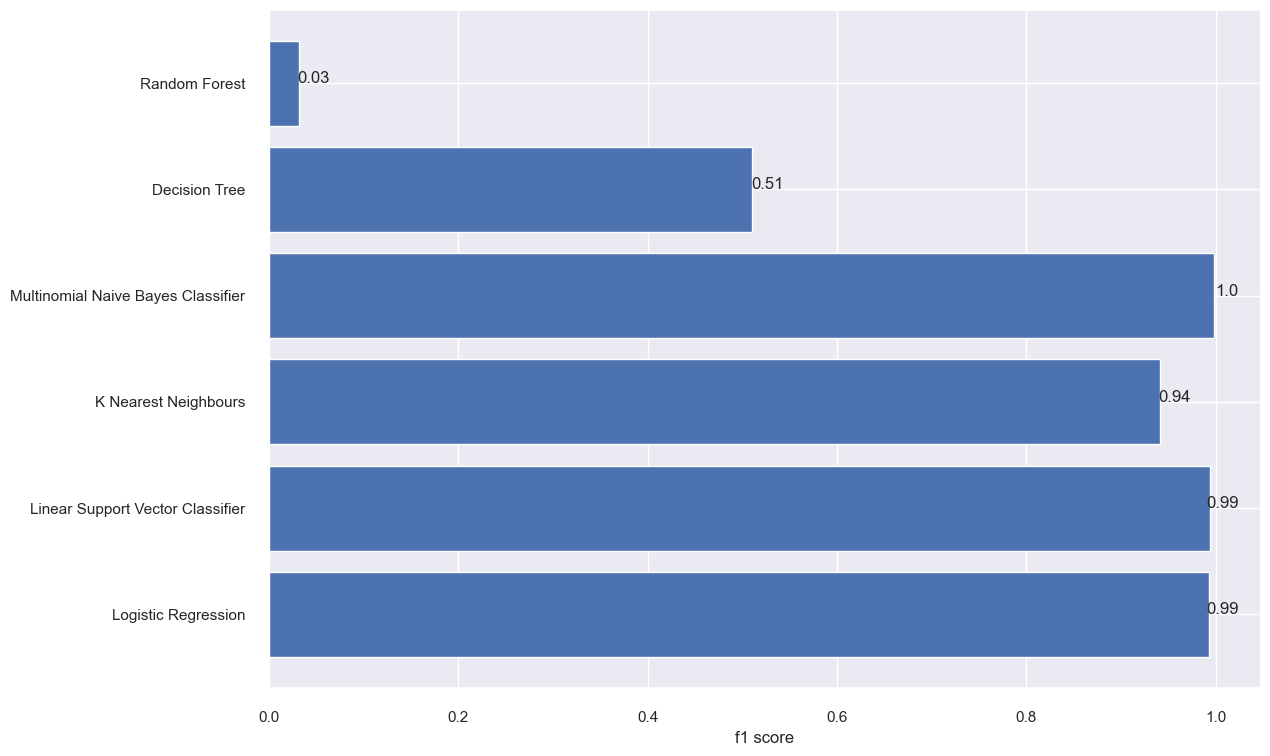

In [39]:
ax = plt.subplot(111)
ax.barh(model_names, [lm_f1, svc_f1, knn_f1, mnbc_f1, tree_f1, forest_f1])
ax.set_xlabel("f1 score")
for index, value in enumerate([round(value,2) for value in [lm_f1, svc_f1, knn_f1, mnbc_f1, tree_f1, forest_f1]]):
    plt.text(value, index, str(value))

## 8. Model Predictions

In [40]:
df_test_data = pd.read_csv("test_set.csv")

In [41]:
def produce_model_submission(df_test, mnbc):
    
    
    
    
    df_test['text'] = df_test['text'].str.lower()
    
    without_stopwords = []
    for lang in range(len(df_test['text'])):
        split = df_test['text'][lang].split(" ")
        for word in stopwords.words('english'):
            if word in split:
                split.remove(word)
        without_stopwords.append(' '.join(map(str, split)))


    df_test["text_without_noise"] = without_stopwords
    
    df_test["text_without_noise"] = df_test["text_without_noise"].apply(remove_punctuation)
    
    tokeniser = TreebankWordTokenizer()
    df_test["tokens_text_without_noise"] = df_test["text_without_noise"].apply(tokeniser.tokenize)
    

    
    df_test['lemma'] = df_test['tokens_text_without_noise'].apply(tokenized_lemma, args=(WordNetLemmatizer(), ))
    
    df_test["lemma_string"] = df_test["lemma"].apply(tostring)
    
    x = df_test["lemma_string"]
    xtv_test = tv.transform(x)
    
    y_pred = mnbc.predict(xtv_test)
    
    df_test["lang_id"] = y_pred
    
    return df_test[["index", "lang_id"]]

In [42]:
produce_model_submission(df_test_data, mnbc).to_csv("khutso13.csv", index=False)

In [43]:
sub = pd.read_csv("khutso13.csv")
sub.head(50)

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
5,6,nso
6,7,nso
7,8,sot
8,9,zul
9,10,eng
